In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('economic_index.csv')
df_index = df.copy()
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [5]:
df_index.drop(columns=['Unnamed: 0','year','month'], axis = 1, inplace=True)

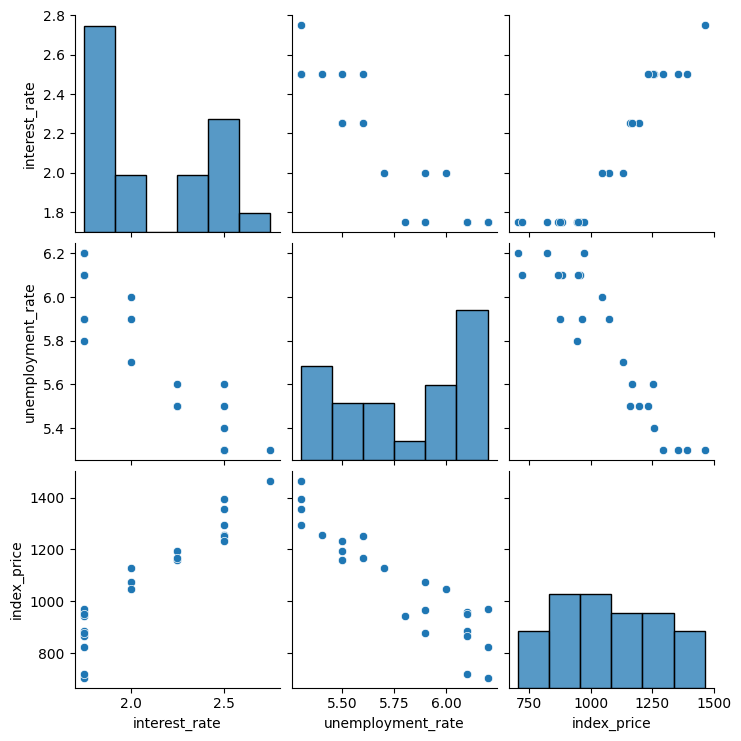

In [6]:
sns.pairplot(df_index)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


<Axes: xlabel='interest_rate', ylabel='index_price'>

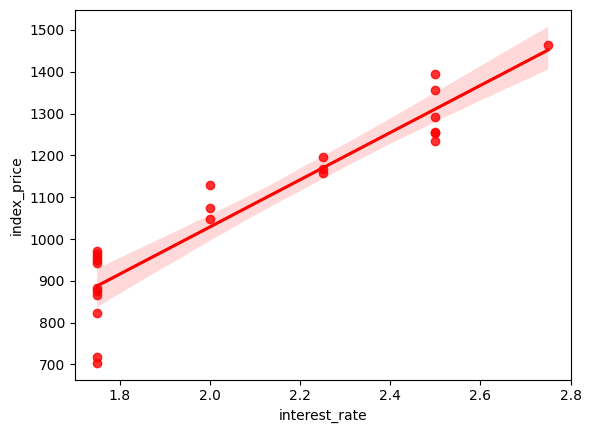

In [8]:
sns.regplot(data=df_index,x=df_index['interest_rate'], y=df_index['index_price'], color='r')

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

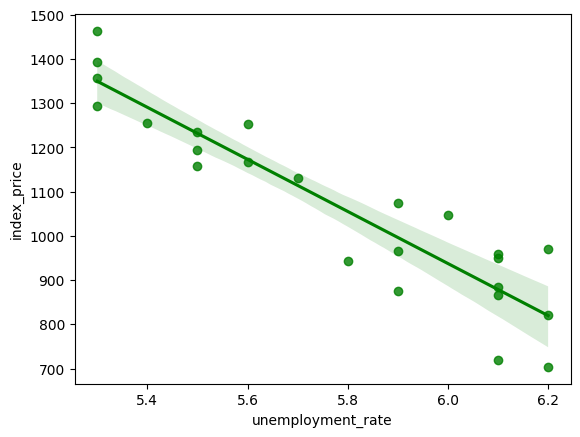

In [9]:
sns.regplot(data=df_index,x=df_index['unemployment_rate'], y=df_index['index_price'], color='g')

In [10]:
##separating independent variables and independent variables
X = df_index.iloc[:,:-1]
Y = df_index.iloc[:,-1]


In [11]:
#train test split
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state = 42)
# print(X_train)

In [12]:
#Standardization
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
x_test = Scaler.transform(x_test)
print(X_train)

[[-0.90115511  0.37908503]
 [ 1.31077107 -1.48187786]
 [-0.90115511  1.30956648]
 [ 1.31077107 -0.55139641]
 [ 1.31077107 -1.48187786]
 [-0.16384638  0.68924552]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -1.48187786]
 [ 1.31077107 -1.17171738]
 [-0.90115511  1.30956648]
 [-0.90115511  0.999406  ]
 [-0.90115511  0.37908503]
 [-0.90115511  0.999406  ]
 [ 0.57346234 -0.8615569 ]
 [-0.16384638 -0.24123593]
 [-0.90115511  0.06892455]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -0.8615569 ]]


In [13]:
##apply linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)
regression.fit(X_train,Y_train)


LinearRegression(n_jobs=-1)

In [14]:
#cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error'
                                ,cv=3)
print(np.mean(validation_score))

-5914.828180162386


In [15]:
y_pred = regression.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [16]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
score_adjusted = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(mse,mae,rmse,score,score_adjusted)

5793.762887712569 59.935781523235484 76.11677139574805 0.8278978091457145 0.7131630152428576


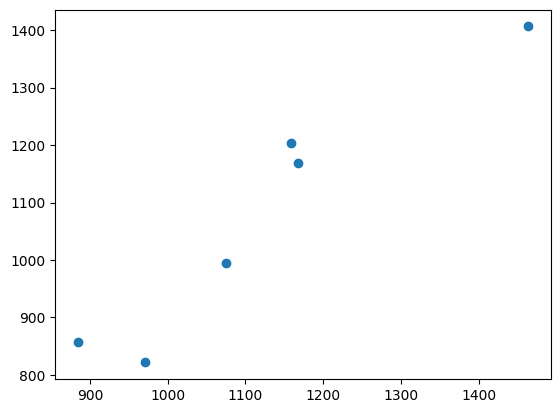

In [17]:
plt.scatter(y_test, y_pred)

In [18]:
print(x_test)

[[ 0.57346234 -0.8615569 ]
 [-0.90115511  1.30956648]
 [ 2.0480798  -1.48187786]
 [-0.90115511  0.999406  ]
 [-0.16384638  0.37908503]
 [ 0.57346234 -0.55139641]]


In [19]:
residuals = y_pred-y_test
print(residuals)
print(np.mean(residuals))

8      45.227704
16   -149.349481
0     -57.486996
18    -26.291104
11    -80.090077
9       1.169327
Name: index_price, dtype: float64
-44.47010455035913


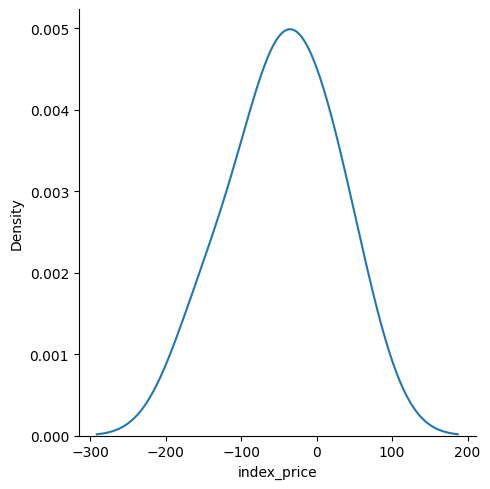

In [20]:
sns.displot(residuals, kind='kde')

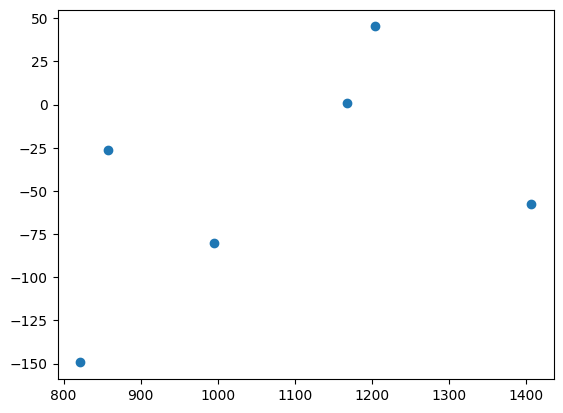

In [21]:
plt.scatter(y_pred, residuals)

OLS


In [22]:
import statsmodels.api as sm

In [23]:
model = sm.OLS(Y_train, X_train).fit()
prediction = model.predict(x_test)
print(prediction)
print(model.summary())

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                       0.754
Time:                        11:05:13   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err 

e:\jai\Python Workspace\Krish Naik Udemy\Python\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [24]:
print(regression.coef_, regression.intercept_)

[  88.27275507 -116.25716066] 1053.4444444444443


ValueError: x and y must be the same size

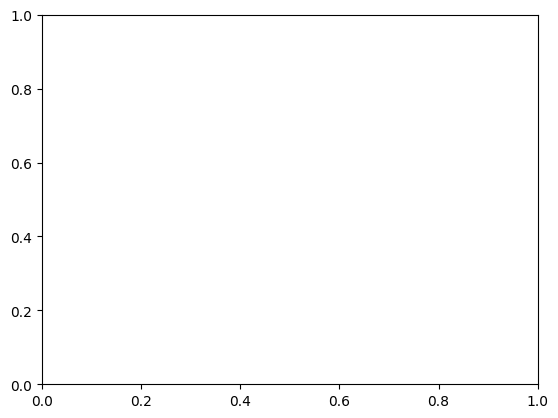

In [25]:
plt.scatter(X_train,regression.predict(X_train))
plt.scatter(X_train,Y_train)